In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
print(np.__version__)

1.13.1
1.16.2


In [14]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words = NUM_WORDS)

In [19]:
type(train_data[0])

list

In [22]:
def multi_hot_sequences(sequences, dimension):
    encodings = np.zeros((len(sequences), dimension))
    for i, word_idx in enumerate(sequences):
        encodings[i, word_idx] = 1.0
    return encodings

In [23]:
train_data = multi_hot_sequences(train_data, NUM_WORDS)
test_data = multi_hot_sequences(test_data, NUM_WORDS)

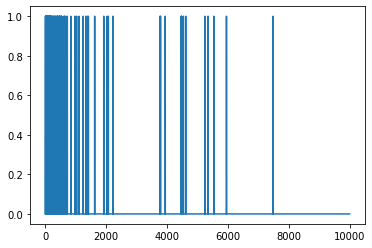

In [24]:
plt.plot(train_data[0])

In [25]:
baseline_model = keras.Sequential([
    # `input_shape` is only required here so that `.summary` works. 
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [26]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Train on 25000 samples, validate on 25000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
 - 7s - loss: 0.4758 - acc: 0.7997 - binary_crossentropy: 0.4758 - val_loss: 0.3214 - val_acc: 0.8794 - val_binary_crossentropy: 0.3214
Epoch 2/20
 - 6s - loss: 0.2378 - acc: 0.9140 - binary_crossentropy: 0.2378 - val_loss: 0.2839 - val_acc: 0.8866 - val_binary_crossentropy: 0.2839
Epoch 3/20
 - 3s - loss: 0.1738 - acc: 0.9387 - binary_crossentropy: 0.1738 - val_loss: 0.2985 - val_acc: 0.8813 - val_binary_crossentropy: 0.2985
Epoch 4/20
 - 3s - loss: 0.1410 - acc: 0.9516 - binary_crossentropy: 0.1410 - val_loss: 0.3421 - val_acc: 0.8698 - val_binary_crossentropy: 0.3421
Epoch 5/20
 - 2s - loss: 0.1144 - acc: 0.9625 - binary_crossentropy: 0.1144 - val_loss: 0.3487 - val_acc: 0.8721 - val_binary_crossentropy: 0.3487
Epoch 6/20
 - 3s - loss: 0.0915 - acc: 0.9724 - binary_crossentropy: 0.0915 - val_loss: 0.3816 - val_acc: 0.8701 - val_binary_crossentropy: 0.3816
Epoch 7/20
 - 3s - l

In [27]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

smaller_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [28]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.6551 - acc: 0.6942 - binary_crossentropy: 0.6551 - val_loss: 0.6096 - val_acc: 0.7524 - val_binary_crossentropy: 0.6096
Epoch 2/20
 - 3s - loss: 0.5406 - acc: 0.8474 - binary_crossentropy: 0.5406 - val_loss: 0.4897 - val_acc: 0.8560 - val_binary_crossentropy: 0.4897
Epoch 3/20
 - 3s - loss: 0.4028 - acc: 0.8949 - binary_crossentropy: 0.4028 - val_loss: 0.3810 - val_acc: 0.8768 - val_binary_crossentropy: 0.3810
Epoch 4/20
 - 2s - loss: 0.3048 - acc: 0.9134 - binary_crossentropy: 0.3048 - val_loss: 0.3247 - val_acc: 0.8846 - val_binary_crossentropy: 0.3247
Epoch 5/20
 - 2s - loss: 0.2499 - acc: 0.9229 - binary_crossentropy: 0.2499 - val_loss: 0.2993 - val_acc: 0.8871 - val_binary_crossentropy: 0.2993
Epoch 6/20
 - 2s - loss: 0.2162 - acc: 0.9315 - binary_crossentropy: 0.2162 - val_loss: 0.2862 - val_acc: 0.8888 - val_binary_crossentropy: 0.2862
Epoch 7/20
 - 2s - loss: 0.1922 - acc: 0.9389 - binary_crossentropy:

In [29]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [30]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 18s - loss: 0.3468 - acc: 0.8505 - binary_crossentropy: 0.3468 - val_loss: 0.2955 - val_acc: 0.8801 - val_binary_crossentropy: 0.2955
Epoch 2/20
 - 16s - loss: 0.1461 - acc: 0.9461 - binary_crossentropy: 0.1461 - val_loss: 0.3362 - val_acc: 0.8722 - val_binary_crossentropy: 0.3362
Epoch 3/20
 - 15s - loss: 0.0510 - acc: 0.9852 - binary_crossentropy: 0.0510 - val_loss: 0.4473 - val_acc: 0.8674 - val_binary_crossentropy: 0.4473
Epoch 4/20
 - 16s - loss: 0.0077 - acc: 0.9989 - binary_crossentropy: 0.0077 - val_loss: 0.5858 - val_acc: 0.8666 - val_binary_crossentropy: 0.5858
Epoch 5/20
 - 15s - loss: 9.3890e-04 - acc: 1.0000 - binary_crossentropy: 9.3890e-04 - val_loss: 0.6625 - val_acc: 0.8688 - val_binary_crossentropy: 0.6625
Epoch 6/20
 - 14s - loss: 2.7151e-04 - acc: 1.0000 - binary_crossentropy: 2.7151e-04 - val_loss: 0.6999 - val_acc: 0.8692 - val_binary_crossentropy: 0.6999
Epoch 7/20
 - 15s - loss: 1.6915e-04 - acc: 1.

In [31]:
sample = np.expand_dims(train_data[0],0)
sample

array([[0., 1., 1., ..., 0., 0., 0.]])

In [32]:
sample.shape

(1, 10000)

In [33]:
train_data.shape

(25000, 10000)

In [39]:
(sample[0][3])

0.0

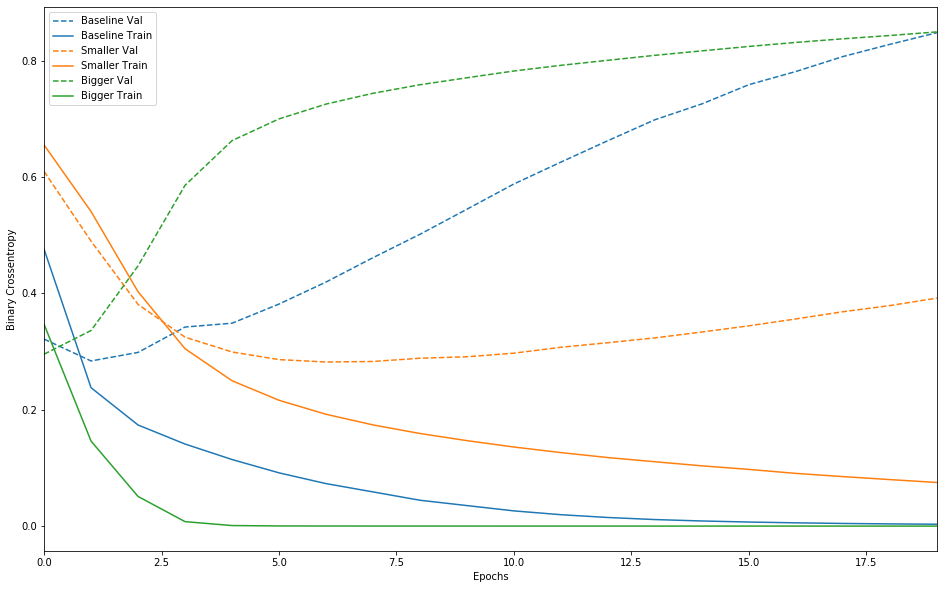

In [41]:
def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(16,10))
    
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

In [42]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 8s - loss: 0.5473 - acc: 0.8097 - binary_crossentropy: 0.5079 - val_loss: 0.3942 - val_acc: 0.8712 - val_binary_crossentropy: 0.3515
Epoch 2/20
 - 4s - loss: 0.3168 - acc: 0.9034 - binary_crossentropy: 0.2683 - val_loss: 0.3393 - val_acc: 0.8873 - val_binary_crossentropy: 0.2868
Epoch 3/20
 - 3s - loss: 0.2627 - acc: 0.9259 - binary_crossentropy: 0.2074 - val_loss: 0.3400 - val_acc: 0.8859 - val_binary_crossentropy: 0.2829
Epoch 4/20
 - 3s - loss: 0.2400 - acc: 0.9372 - binary_crossentropy: 0.1811 - val_loss: 0.3535 - val_acc: 0.8818 - val_binary_crossentropy: 0.2933
Epoch 5/20
 - 3s - loss: 0.2250 - acc: 0.9444 - binary_crossentropy: 0.1639 - val_loss: 0.3644 - val_acc: 0.8784 - val_binary_crossentropy: 0.3026
Epoch 6/20
 - 3s - loss: 0.2132 - acc: 0.9492 - binary_crossentropy: 0.1504 - val_loss: 0.3744 - val_acc: 0.8768 - val_binary_crossentropy: 0.3113
Epoch 7/20
 - 3s - loss: 0.2056 - acc: 0.9517 - binary_crossentropy:

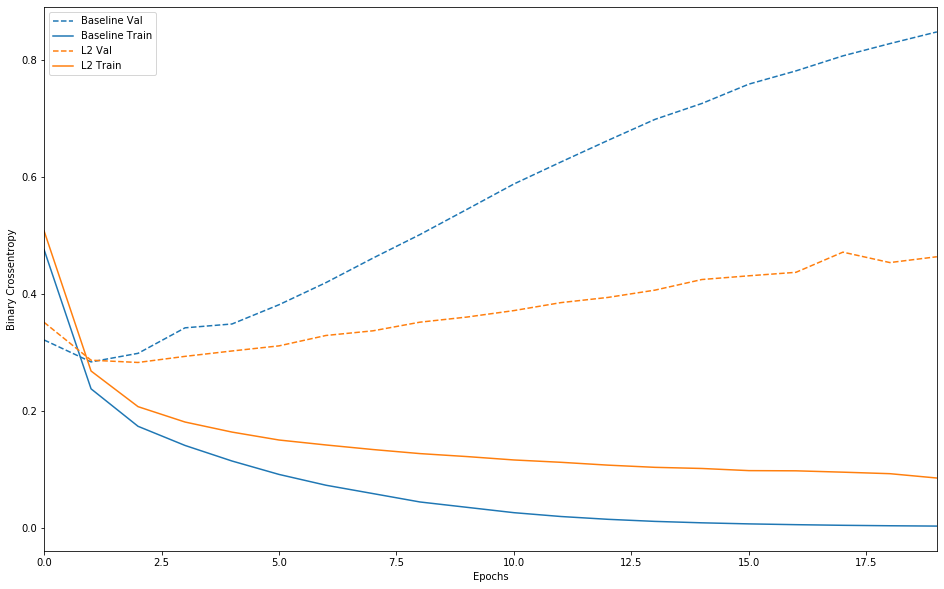

In [43]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

In [44]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 6s - loss: 0.6188 - acc: 0.6436 - binary_crossentropy: 0.6188 - val_loss: 0.4826 - val_acc: 0.8545 - val_binary_crossentropy: 0.4826
Epoch 2/20
 - 4s - loss: 0.4578 - acc: 0.8040 - binary_crossentropy: 0.4578 - val_loss: 0.3426 - val_acc: 0.8801 - val_binary_crossentropy: 0.3426
Epoch 3/20
 - 3s - loss: 0.3580 - acc: 0.8690 - binary_crossentropy: 0.3580 - val_loss: 0.2981 - val_acc: 0.8832 - val_binary_crossentropy: 0.2981
Epoch 4/20
 - 3s - loss: 0.3005 - acc: 0.8936 - binary_crossentropy: 0.3005 - val_loss: 0.2805 - val_acc: 0.8861 - val_binary_crossentropy: 0.2805
Epoch 5/20
 - 4s - loss: 0.2581 - acc: 0.9154 - binary_crossentropy: 0.2581 - val_loss: 0.2814 - val_acc: 0.8864 - val_binary_crossentropy: 0.2814
Epoch 6/20
 - 3s - loss: 0.2262 - acc: 0.9268 - binary_crossentropy: 0.2262 - val_loss: 0.2877 - val

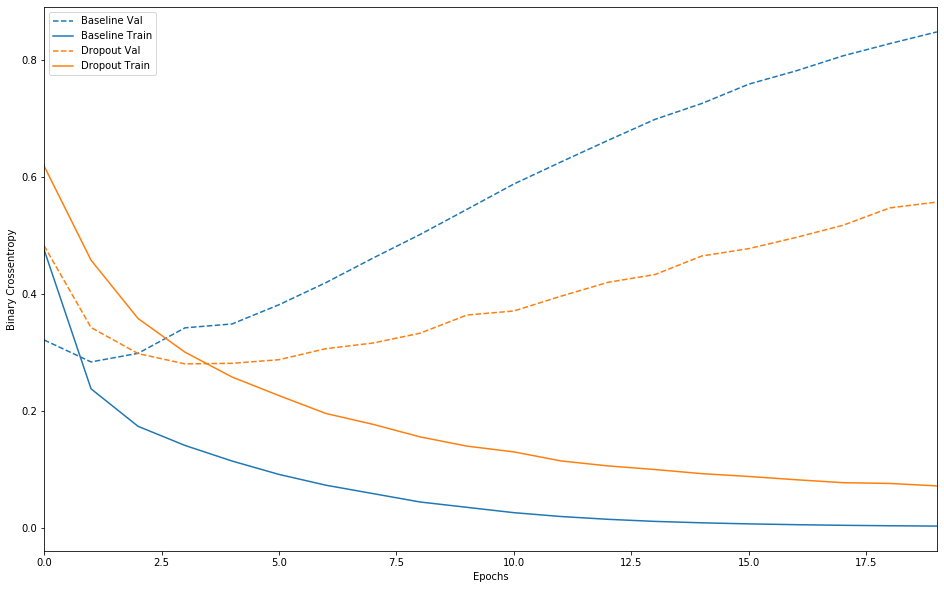

In [45]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])